# Efficient Frontier - Part II

In [9]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit as erk
import numpy as np

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [4]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [8]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [10]:
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [11]:
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [12]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

### 2 Asset Frontier

In [13]:
l = ["Games", "Fin"]

In [18]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [19]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
rets

[0.22337143343356036,
 0.21520512368930153,
 0.20703881394504264,
 0.19887250420078378,
 0.19070619445652492,
 0.18253988471226607,
 0.17437357496800718,
 0.16620726522374832,
 0.15804095547948946,
 0.14987464573523063,
 0.14170833599097174,
 0.13354202624671288,
 0.12537571650245402,
 0.11720940675819516,
 0.1090430970139363,
 0.10087678726967743,
 0.09271047752541857,
 0.08454416778115972,
 0.07637785803690085,
 0.06821154829264198]

In [21]:
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
vols

[0.0630997295785121,
 0.06184548206317772,
 0.06069878923524834,
 0.05966585256137839,
 0.058752672223312284,
 0.05796490842860514,
 0.05730773341483651,
 0.05678568123574939,
 0.056402504039475894,
 0.0561610444586889,
 0.05606313362372235,
 0.05610952301512326,
 0.056299855936855894,
 0.05663268109748638,
 0.05710550711027121,
 0.05771489323047962,
 0.05845656886221488,
 0.05932557264732352,
 0.06031640142594411,
 0.061423159933946626]

In [22]:
import pandas as pd
ef = pd.DataFrame({"R": rets, "Vol": vols})

<Axes: xlabel='Vol', ylabel='R'>

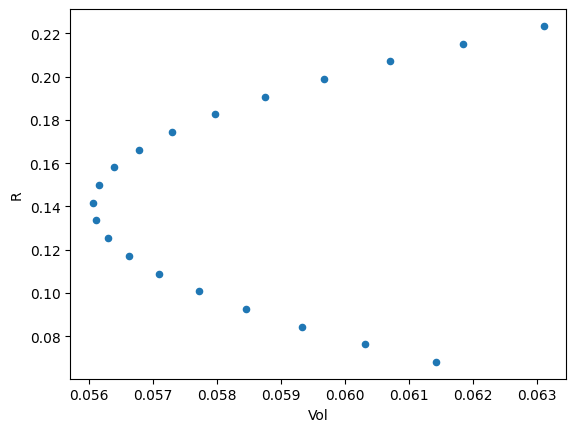

In [23]:
ef.plot.scatter(x="Vol", y="R")

<Axes: xlabel='Volatility'>

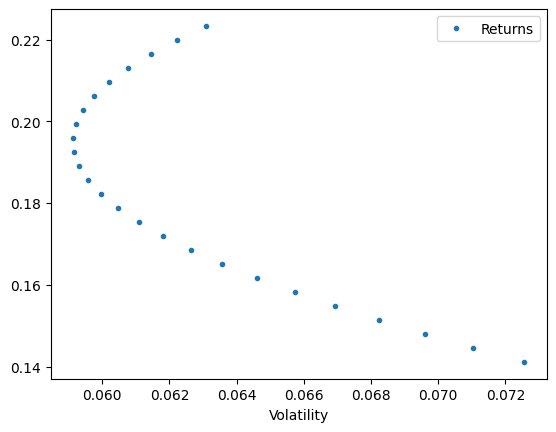

In [32]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l, l], style=".")